# Predicting Survival On The Titanic

This is a very interesting dataset hosted on kaggle. The dataset contains details about the passengers aboard the titanic and we need to use these features to predict whether the passenger survived or not. This dataset is difficult to model as the data is very noisy. Most of the data is missing and some of the features don't really tell us anything about the passenger's survival rate. This calls for very rigorous analysis and feature engineering 

## Load the libraires

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Load the data

In [3]:
testFilename = './data/test.csv'
trainFilename = './data/train.csv'

testData = read_csv(testFilename)
dataset = read_csv(trainFilename)

## Analysing and visualizations 

let's take a peek at what the dataset looks like.  We see that the dataset contains 11 features. We can also that the dataset does contain missing values which are evident from the NaN visible in the Cabin feature.

Dealing with missing values can be difficult. Some machine learning models like Logistic regression don't handle missing values well and result in poor performance. While others like Tree-based models can be quite robust towards them.

The strategy for dealing with missing values depends on the nature or reason of why the values are missing. Missing values can be broadly classified as.
1. *The missing values can be treated as information* - In some cases, the fact that a value missing holds a lot of information. For example, in a dataset which classifies people on whether they are likely to contract a disease based on their living conditions, then if the salary feature contains missing values may mean that the person doesn't earn or it was not possible to record his salary. This missing value will help in better classifying people of this category.

2. *The values are missing at random but the feature is important* - The best way to deal with such features is to impute the missing values using the mean, median or just predict it using simple ML.

3. *The feature is mostly noise and holds very low information* - These features require a lot of feature engineering to make good use of them. Probably the best way to deal with them is to drop them.

In [4]:
testData.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
dataset.shape

(891, 12)

In [7]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

It seems that the features PassengerId, Name, Ticket, Cabin might not be that useful for predictions either due to missing values or the small amount of information that the features contain.

So we are going to drop these features

In [8]:
_dataset = dataset.drop(dataset.columns[[0, 3, 8, 10]], axis=1)
_dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [9]:
# 
Ydf = _dataset['Survived']
Y = Ydf.values
_dataset.drop('Survived', axis=1, inplace=True)
Y[:5]

array([0, 1, 1, 1, 0])

In [10]:
_dataset.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Let's see the statistics of our data. We see that the most of the features have a variable scale in their data. This difference in scale can damage the performance of algorithms like Logistic regression and SVM that need to perform mathematical operations between different features. However Tree-based methods are fairly robust to these variations as they only compute comparisons between the same feature.

This means that we need to normalize the data in order to make the scale of different features comparable.

In [11]:
_dataset.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


The Class distribution of our data is not properly balanced. This can cause difficulty in training. But we will ignore it for now.

In [12]:
dataset.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

For most machine learning algorithms it is important that the features are not correlated to on another. Highly correlated features dont add any extra information to the model and increase model complexity. If the features contain a lot of noise then they will misguide the model and result in poor performance.

Looking at out data we see that some of the features show a strong correlation to one another. We can deal with this by either using feature selection or dimensionality reduction

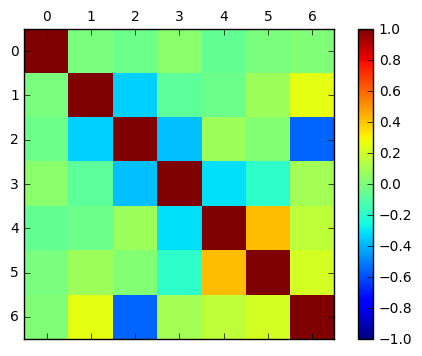

In [13]:
corr = _dataset.corr(method='pearson')
corr = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

The distribution of some of our features is highly skewed. The PClass feature shows a tri-modal distribution. Most ML algorithms work best with gaussian normal distributions.   We can fix some of this problem by standardizing the dataset.

In [14]:
_dataset.skew()

Pclass   -0.630548
Age       0.389108
SibSp     3.695352
Parch     2.749117
Fare      4.787317
dtype: float64

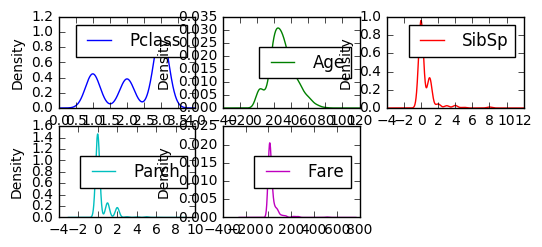

In [15]:
'''
    we see that
    age - gaussian 
    pclass - tri modal
    sibsp, parch, fare - exponential 
'''

_dataset.plot(kind='density', subplots=True, layout=(3, 3), sharex=False)
plt.show()

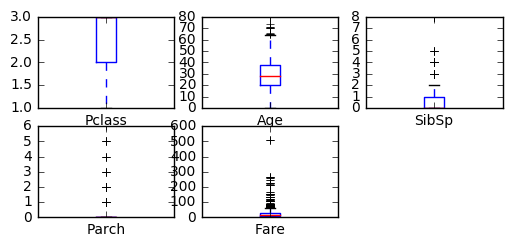

In [16]:
_dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

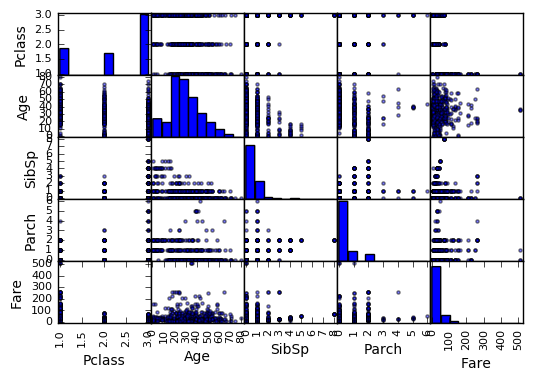

In [17]:
scatter_matrix(_dataset)
plt.show()

One-Hot encoding categorical variables

In [18]:
# encoding string values 
sex_encoder = LabelEncoder().fit(_dataset['Sex'])
emb_encoder = LabelEncoder().fit(_dataset['Embarked'])

sex_encoder.classes_
emb_encoder.classes_

_dataset['Sex'] = sex_encoder.transform(_dataset['Sex'])
_dataset['Embarked'] = emb_encoder.transform(_dataset['Embarked'])

_dataset.head(10)

/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3
5,3,1,NaN,0,0,8.4583,2
6,1,1,54.0,0,0,51.8625,3
7,3,1,2.0,3,1,21.0750,3
8,3,0,27.0,0,2,11.1333,3
9,2,0,14.0,1,0,30.0708,1


Filling missing age rows with the median age

In [19]:
_dataset_agefix = _dataset
_dataset_agefix['Age'] = _dataset_agefix['Age'].fillna(_dataset_agefix['Age'].median())
_dataset_agefix.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3
5,3,1,28.0,0,0,8.4583,2
6,1,1,54.0,0,0,51.8625,3
7,3,1,2.0,3,1,21.0750,3
8,3,0,27.0,0,2,11.1333,3
9,2,0,14.0,1,0,30.0708,1


## Split the data into traning and validation set

In [20]:
X = _dataset_agefix.values

# split a validation set
validation_size = 0.2
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

X_train[:5]

array([[  3.    ,   0.    ,   2.    ,   0.    ,   1.    ,  10.4625,   3.    ],
       [  3.    ,   1.    ,  28.    ,   0.    ,   0.    ,  15.5   ,   2.    ],
       [  1.    ,   0.    ,  39.    ,   1.    ,   1.    ,  83.1583,   1.    ],
       [  3.    ,   1.    ,  74.    ,   0.    ,   0.    ,   7.775 ,   3.    ],
       [  3.    ,   1.    ,  28.    ,   0.    ,   0.    ,   7.225 ,   1.    ]])

## Spot Checking
There is no best ML algorithm, some algorithms work better with some type of data while others may not. The only way to find out is by trying them all. Let's spot check the data without standardizing and see which algorithms work best

In [21]:
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('CART_5', DecisionTreeClassifier(min_samples_split=5)),
    ('CART_50', DecisionTreeClassifier(min_samples_split=50)),
    ('CART_100', DecisionTreeClassifier(min_samples_split=100)),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('SVM_5', SVC(C=.5))
]

results = []
names = []

n_splits = 10
seed = 7
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print name, ':', cv_results.mean(), (cv_results.std())

LR : 0.807629107981 0.0487305355186
LDA : 0.80201486698 0.0509094844173
KNN : 0.688458528951 0.0849777146529
CART : 0.771185446009 0.0462078111582
CART_5 : 0.779636150235 0.0532579718358
CART_50 : 0.814710485133 0.0495588312514
CART_100 : 0.830164319249 0.0565442587957
NB : 0.794953051643 0.0534312499806
SVM : 0.708176838811 0.0941946320333
SVM_5 : 0.657609546166 0.0960418616561


We see that Logistic Regression, Decision tree and LDA work best on the data with out standardization.
But KNN and SVM are underperforming, this can be due to variable scale of the data.

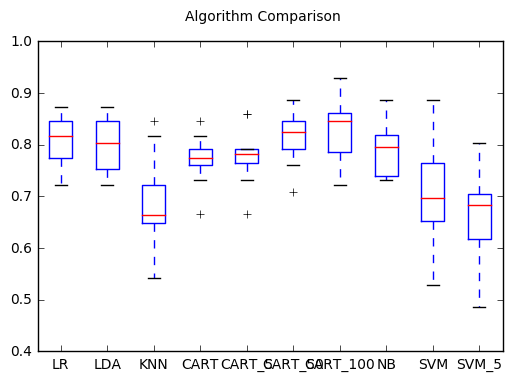

In [22]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

## Spot Checking with standardization

In [25]:
pipelines = [
    ('ScaledLR', Pipeline([
                ('Scaler', StandardScaler()),
                ('LR', LogisticRegression())]
                         )
    ),
    ('ScaledLDA', Pipeline([
                ('Scaler', StandardScaler()),
                ('LDA', LinearDiscriminantAnalysis())]
                         )
    ),
    ('ScaledKNN', Pipeline([
                ('Scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier())]
                         )
    ),
    ('ScaledCART', Pipeline([
                ('Scaler', StandardScaler()),
                ('CART', DecisionTreeClassifier(min_samples_split=100))]
                         )
    ),
    ('ScaledNB', Pipeline([
                ('Scaler', StandardScaler()),
                ('NB', GaussianNB())]
                         )
    ),
    ('ScaledSVM', Pipeline([
                ('Scaler', StandardScaler()),
                ('SVM', SVC())]
                         )
    ),
]

results = []
names = []

n_splits = 10
seed = 7
scoring = 'accuracy'

for name, model in pipelines:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print name, ':', cv_results.mean(), (cv_results.std())

ScaledLR : 0.807648669797 0.0458446532421
ScaledLDA : 0.80201486698 0.0509094844173
ScaledKNN : 0.817644757433 0.0597094925504
ScaledCART : 0.830164319249 0.0565442587957
ScaledNB : 0.794953051643 0.0534312499806
ScaledSVM : 0.841412363067 0.0521148238465


We see that the previously underperforming SVM now show the highest accuracy after standardiztaion.

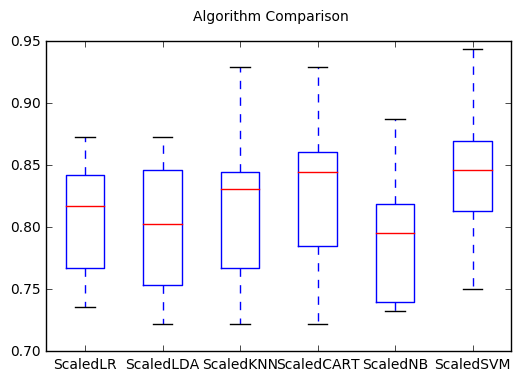

In [27]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

Let's look into some Ensemble methods. Ensemble methods generally show better accuracy than just one model.

In [28]:
models = [
    ('ADA', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('RF_50', RandomForestClassifier(min_samples_split=50, n_estimators=50)),
    ('RF_100', RandomForestClassifier(min_samples_split=100, n_estimators=100)),
    ('ET_50', ExtraTreesClassifier(min_samples_split=50, n_estimators=50)),
    ('ET_100', ExtraTreesClassifier(min_samples_split=100, n_estimators=100))
]

results = []
names = []

n_splits = 10
seed = 7
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print name, ':', cv_results.mean(), (cv_results.std())

ADA : 0.820305164319 0.0611431254922
GBM : 0.825997652582 0.0493162055247
RF_50 : 0.827386541471 0.0546205819105
RF_100 : 0.814710485133 0.0574377538255
ET_50 : 0.831553208138 0.0521191118193
ET_100 : 0.817527386541 0.04199824717


We see that the performance of these Ensemble models are compareable to what we achived using SVM.

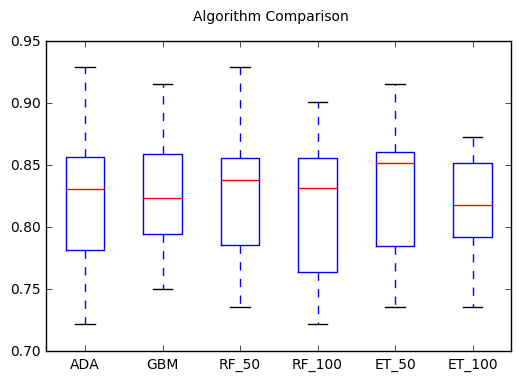

In [29]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

## Conlusion
From the above analysis, we have concluded that the following models work best for our data.
1. CART_100
2. SVM
3. Random Forest

We can now move on to fine tuning these algorithms to achieve best performance for our data.


In [30]:
# Tuning CART
'''
    best parameters 
    min_samples_split = 100
    max_depth = 10
    min_samples_leaf = 9
'''

min_samples_splits = np.array([10, 50, 100, 150, 200])
min_samples_leafs = np.array([2, 3, 5, 7, 9, 11])
max_depths = np.array([10, 50, 100, 150, 200])

param_grid = dict(min_samples_split=min_samples_splits, min_samples_leaf=min_samples_leafs, max_depth=max_depths)

model = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)

grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832865 using {'min_samples_split': 100, 'max_depth': 10, 'min_samples_leaf': 9}
0.803371 (0.053254) with: {'min_samples_split': 10, 'max_depth': 10, 'min_samples_leaf': 2}
0.814607 (0.049722) with: {'min_samples_split': 50, 'max_depth': 10, 'min_samples_leaf': 2}
0.831461 (0.057149) with: {'min_samples_split': 100, 'max_depth': 10, 'min_samples_leaf': 2}
0.811798 (0.047087) with: {'min_samples_split': 150, 'max_depth': 10, 'min_samples_leaf': 2}
0.811798 (0.047087) with: {'min_samples_split': 200, 'max_depth': 10, 'min_samples_leaf': 2}
0.800562 (0.052922) with: {'min_samples_split': 10, 'max_depth': 10, 'min_samples_leaf': 3}
0.824438 (0.050251) with: {'min_samples_split': 50, 'max_depth': 10, 'min_samples_leaf': 3}
0.830056 (0.056621) with: {'min_samples_split': 100, 'max_depth': 10, 'min_samples_leaf': 3}
0.811798 (0.047087) with: {'min_samples_split': 150, 'max_depth': 10, 'min_samples_leaf': 3}
0.811798 (0.047087) with: {'min_samples_split': 200, 'max_depth': 10, 'min_samp

In [31]:
'''
    Best parameters for SVM
    kernel = sigmoid
    C = 0.3
'''

drop_set = 0.8

X_svm ,_, Y_svm, _ = train_test_split(X_train, Y_train, test_size=drop_set, random_state=seed)

scaler = StandardScaler().fit(X_svm)
rescaledX = scaler.transform(X_svm)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=3, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)

grid_result = grid.fit(rescaledX, Y_svm)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830986 using {'kernel': 'sigmoid', 'C': 0.3}
0.823944 (0.041714) with: {'kernel': 'linear', 'C': 0.1}
0.697183 (0.036694) with: {'kernel': 'poly', 'C': 0.1}
0.683099 (0.017594) with: {'kernel': 'rbf', 'C': 0.1}
0.697183 (0.035307) with: {'kernel': 'sigmoid', 'C': 0.1}
0.823944 (0.041714) with: {'kernel': 'linear', 'C': 0.3}
0.711268 (0.033026) with: {'kernel': 'poly', 'C': 0.3}
0.809859 (0.015618) with: {'kernel': 'rbf', 'C': 0.3}
0.830986 (0.043847) with: {'kernel': 'sigmoid', 'C': 0.3}
0.823944 (0.041714) with: {'kernel': 'linear', 'C': 0.5}
0.711268 (0.033026) with: {'kernel': 'poly', 'C': 0.5}
0.809859 (0.015618) with: {'kernel': 'rbf', 'C': 0.5}
0.816901 (0.047807) with: {'kernel': 'sigmoid', 'C': 0.5}
0.823944 (0.041714) with: {'kernel': 'linear', 'C': 0.7}
0.739437 (0.023852) with: {'kernel': 'poly', 'C': 0.7}
0.823944 (0.041714) with: {'kernel': 'rbf', 'C': 0.7}
0.802817 (0.034592) with: {'kernel': 'sigmoid', 'C': 0.7}
0.823944 (0.041714) with: {'kernel': 'linear', 'C':

In [32]:
#Final Validation of CART
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = DecisionTreeClassifier(min_samples_split = 100, max_depth = 10, min_samples_leaf = 9)
model.fit(rescaledX, Y_train)

rescaledValidationX = scaler.transform(X_validation)
predict = model.predict(rescaledValidationX)


print(accuracy_score(Y_validation, predict))
print(confusion_matrix(Y_validation, predict))
print(classification_report(Y_validation, predict))

0.748603351955
[[93 17]
 [28 41]]
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       110
          1       0.71      0.59      0.65        69

avg / total       0.74      0.75      0.74       179



In [33]:
# Final Validation of SVM
# pca = PCA(n_components=4)


model = Pipeline([
        ('SVM', SVC())])
model.fit(rescaledX, Y_train)

predict = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation, predict))
print(confusion_matrix(Y_validation, predict))
print(classification_report(Y_validation, predict))


0.759776536313
[[95 15]
 [28 41]]
             precision    recall  f1-score   support

          0       0.77      0.86      0.82       110
          1       0.73      0.59      0.66        69

avg / total       0.76      0.76      0.75       179



In [34]:
model = RandomForestClassifier()
model.fit(rescaledX, Y_train)

predict = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation, predict))
print(confusion_matrix(Y_validation, predict))
print(classification_report(Y_validation, predict))

0.77094972067
[[94 16]
 [25 44]]
             precision    recall  f1-score   support

          0       0.79      0.85      0.82       110
          1       0.73      0.64      0.68        69

avg / total       0.77      0.77      0.77       179



This concludes our ML workflow for the titanic dataset. We achieved a final accurary of 77% by using a Random Forest classifier. 

There is still a lot that can be done in order to improve the accuracy of the model. We can perform feature engineering inorder to deal with the correlated variables and extract better information from the feature we chose to drop at the start.